In [ ]:
# AI Grievance Management System - Synthetic Data Generator
# Focus State: Uttar Pradesh (Season-aware)
# Author: Krishna

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

In [2]:
START_DATE = "2024-01-01"
END_DATE = "2025-12-31"

# Main grievance categories (same as NLP processor)
categories = ["Infrastructure", "Utilities", "Sanitation", "Medical"]

#10 major cities/districts of Uttar Pradesh
regions = [
    "Lucknow", "Kanpur", "Varanasi", "Agra", "Meerut",
    "Prayagraj", "Gorakhpur", "Bareilly", "Noida", "Ghaziabad"
]

Helper Function to get season based on Month

In [3]:
def get_season(month):
    if month in [6, 7, 8, 9]:
        return "Monsoon"
    elif month in [3, 4, 5]:
        return "Summer"
    elif month in [10, 11]:
        return "Post-Monsoon"
    else:
        return "Winter"

In [4]:
#HELPER FUNCTION — SEASONAL MULTIPLIERS PER CATEGORY
def get_seasonal_multiplier(category, season):
    """
    Define how each category's complaint volume changes by season.
    """
    mapping = {
        "Infrastructure": {"Monsoon": 1.6, "Summer": 1.0, "Post-Monsoon": 0.9, "Winter": 0.8},
        "Sanitation": {"Monsoon": 1.4, "Summer": 1.0, "Post-Monsoon": 0.9, "Winter": 0.8},
        "Utilities": {"Monsoon": 1.0, "Summer": 1.5, "Post-Monsoon": 1.1, "Winter": 0.9},
        "Medical": {"Monsoon": 1.2, "Summer": 1.0, "Post-Monsoon": 1.3, "Winter": 1.1},
    }
    return mapping[category][season]

In [5]:
#BASE COMPLAINT COUNTS (estimated average per region per day)
base_counts = {
    "Infrastructure": 50,
    "Utilities": 40,
    "Sanitation": 30,
    "Medical": 25
}

In [6]:
#CREATE DATE RANGE
dates = pd.date_range(start=START_DATE, end=END_DATE, freq="D")

Synthetic Data Generation

In [7]:
records = []

for date in dates:
    season = get_season(date.month)
    for region in regions:
        for category in categories:
            base = base_counts[category]
            multiplier = get_seasonal_multiplier(category, season)

            # Add realistic random fluctuations (noise)
            noise = random.uniform(-8, 8)

            # Population/region weight (bigger cities = more complaints)
            region_weight = {
                "Lucknow": 1.4, "Kanpur": 1.3, "Varanasi": 1.1, "Agra": 1.0,
                "Meerut": 0.9, "Prayagraj": 1.0, "Gorakhpur": 0.8,
                "Bareilly": 0.8, "Noida": 1.2, "Ghaziabad": 1.3
            }[region]

            count = max(0, int(base * multiplier * region_weight + noise))
            records.append([date, region, category, count, season])

DataFrame Creation

In [8]:
df = pd.DataFrame(records, columns=["date", "region", "category", "count", "season"])

In [9]:
#ADD YEAR & MONTH FOR REFERENCE
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

Saving to as CSV File

In [10]:
file_name = "up_grievances_synthetic.csv"
df.to_csv(file_name, index=False)
print(f"Synthetic dataset generated and saved as '{file_name}'")
print("Total Records:", len(df))
print(df.head(10))

Synthetic dataset generated and saved as 'up_grievances_synthetic.csv'
Total Records: 29240
        date    region        category  count  season  year  month
0 2024-01-01   Lucknow  Infrastructure     50  Winter  2024      1
1 2024-01-01   Lucknow       Utilities     49  Winter  2024      1
2 2024-01-01   Lucknow      Sanitation     31  Winter  2024      1
3 2024-01-01   Lucknow         Medical     34  Winter  2024      1
4 2024-01-01    Kanpur  Infrastructure     59  Winter  2024      1
5 2024-01-01    Kanpur       Utilities     52  Winter  2024      1
6 2024-01-01    Kanpur      Sanitation     27  Winter  2024      1
7 2024-01-01    Kanpur         Medical     29  Winter  2024      1
8 2024-01-01  Varanasi  Infrastructure     45  Winter  2024      1
9 2024-01-01  Varanasi       Utilities     44  Winter  2024      1


Some Quick Sanity Checks

In [11]:
print("\nAverage complaints per category:")
print(df.groupby("category")["count"].mean())

print("\nSeasonal average:")
print(df.groupby("season")["count"].mean())


Average complaints per category:
category
Infrastructure    60.664022
Medical           30.341450
Sanitation        34.027497
Utilities         47.783311
Name: count, dtype: float64

Seasonal average:
season
Monsoon         51.392111
Post-Monsoon    39.500615
Summer          44.017120
Winter          33.835773
Name: count, dtype: float64


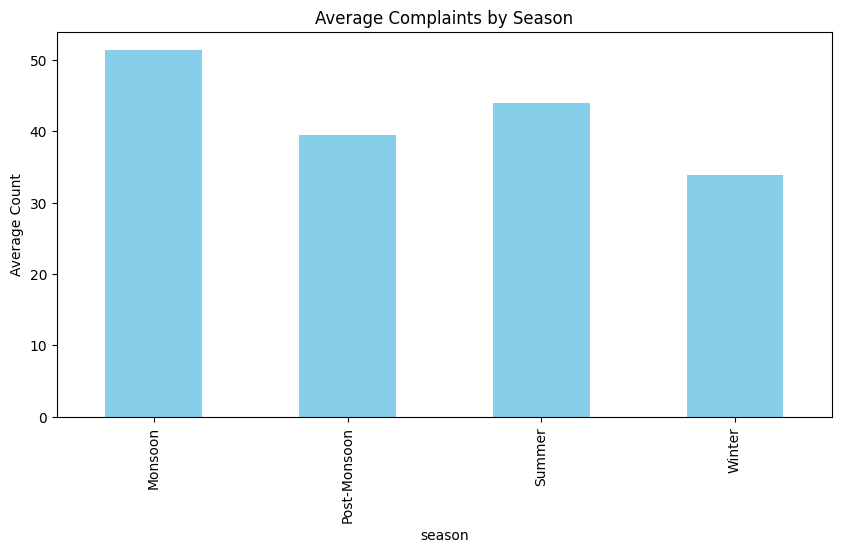

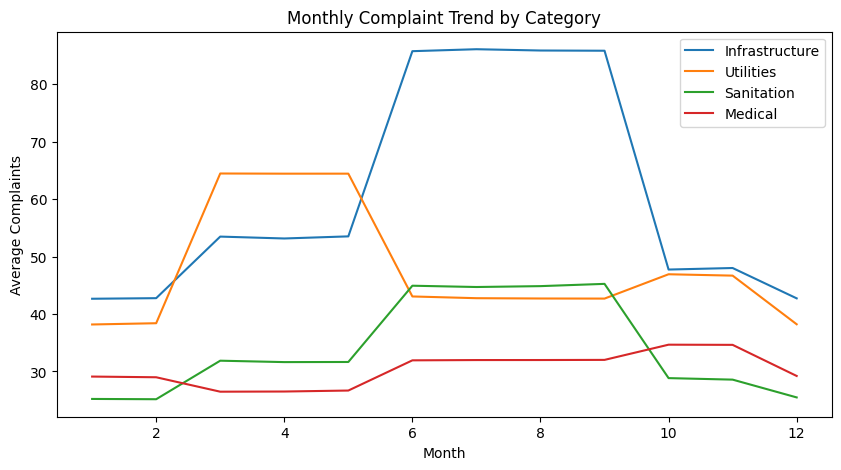

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
df.groupby("season")["count"].mean().plot(kind="bar", color="skyblue")
plt.title("Average Complaints by Season")
plt.ylabel("Average Count")
plt.show()

plt.figure(figsize=(10,5))
for c in categories:
    subset = df[df["category"] == c]
    subset.groupby("month")["count"].mean().plot(label=c)
plt.legend()
plt.title("Monthly Complaint Trend by Category")
plt.xlabel("Month")
plt.ylabel("Average Complaints")
plt.show()
